<a href="https://colab.research.google.com/github/jlpontes/creditFraud-prediction/blob/main/fraud_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Improve graphic visualization
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
df = pd.read_csv('creditcard.csv', on_bad_lines='skip')


In [5]:
df.head()




,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [6]:
df.tail()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
93176,64282,1.236457,0.214973,0.637424,0.703850,-0.693740,-1.194417,0.028446,-0.192515,0.113517,...,-0.242734,-0.733475,0.183933,0.689987,0.153440,0.076317,-0.032589,0.021078,1.98,0.0
93177,64282,1.156176,-0.319928,0.795544,0.469805,-0.838118,-0.032839,-0.695444,0.261600,0.876403,...,-0.013132,-0.152065,0.055522,-0.313683,0.037605,0.448817,-0.010598,0.018465,29.39,0.0
93178,64283,-0.374903,0.013912,0.888019,-1.723059,0.112982,-1.092045,0.697306,-0.351545,-1.067566,...,-0.436675,-0.678615,-0.027299,-0.136985,-0.404849,0.813763,0.106798,-0.027620,30.00,0.0
93179,64283,-0.508209,-0.102169,2.060352,-1.712190,-0.000407,0.804499,0.190440,0.002202,-0.540778,...,0.048476,0.510975,-0.512486,-0.854798,0.710197,-0.104946,-0.092805,-0.177516,29.90,0.0
93180,64283,-0.537899,0.550337,0.106653,-2.454657,2.316797,3.199409,0.048235,0.951972,-0.145197,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93181 entries, 0 to 93180
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    93181 non-null  int64  
 1   V1      93181 non-null  float64
 2   V2      93181 non-null  float64
 3   V3      93181 non-null  float64
 4   V4      93181 non-null  float64
 5   V5      93181 non-null  float64
 6   V6      93181 non-null  float64
 7   V7      93181 non-null  float64
 8   V8      93181 non-null  float64
 9   V9      93181 non-null  float64
 10  V10     93181 non-null  float64
 11  V11     93181 non-null  float64
 12  V12     93181 non-null  float64
 13  V13     93180 non-null  float64
 14  V14     93180 non-null  float64
 15  V15     93180 non-null  float64
 16  V16     93180 non-null  float64
 17  V17     93180 non-null  float64
 18  V18     93180 non-null  float64
 19  V19     93180 non-null  float64
 20  V20     93180 non-null  float64
 21  V21     93180 non-null  float64
 22

In [8]:
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,93181.000000,93181.000000,93181.000000,93181.000000,93181.000000,93181.000000,93181.000000,93181.000000,93181.000000,93181.000000,...,93180.000000,93180.000000,93180.000000,93180.000000,93180.000000,93180.000000,93180.000000,93180.000000,93180.000000,93180.000000
mean,40720.460405,-0.263002,-0.040780,0.676306,0.163064,-0.280078,0.093917,-0.108816,0.055540,-0.036898,...,-0.029999,-0.107373,-0.037835,0.009540,0.132163,0.026936,0.001515,0.002321,99.030945,0.002286
std,16392.444505,1.869011,1.664308,1.341575,1.355105,1.368687,1.303615,1.225238,1.209672,1.123318,...,0.723135,0.634840,0.640783,0.594557,0.442183,0.495719,0.389447,0.324150,268.350415,0.047757
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,32678.000000,-1.028016,-0.605706,0.179018,-0.716783,-0.898708,-0.647692,-0.600859,-0.139122,-0.695859,...,-0.224205,-0.528068,-0.177280,-0.322364,-0.132298,-0.325627,-0.062925,-0.005614,7.600000,0.000000
50%,42848.000000,-0.258489,0.072818,0.756532,0.189117,-0.314928,-0.156536,-0.069893,0.072409,-0.109294,...,-0.057606,-0.082454,-0.049500,0.064890,0.170764,-0.070610,0.009579,0.023267,26.945000,0.000000
75%,53622.000000,1.153021,0.728656,1.381324,1.034477,0.250915,0.487658,0.415870,0.357253,0.576494,...,0.119664,0.309217,0.081457,0.406029,0.420096,0.304235,0.082701,0.076475,89.990000,0.000000
max,64283.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,18.946734,4.014444,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


In [9]:
print(df['Class'].value_counts())

Class
0.0    92967
1.0      213
Name: count, dtype: int64


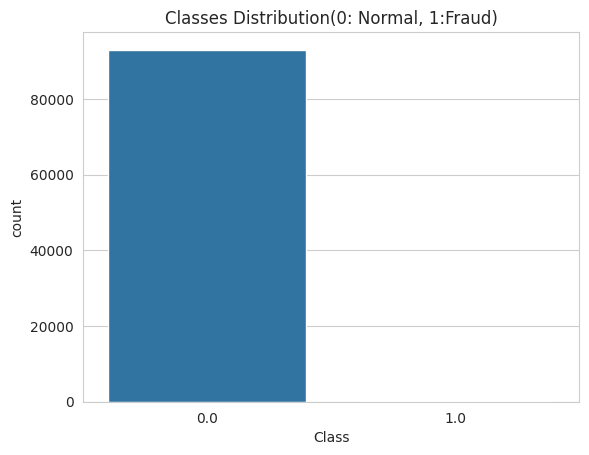

In [10]:
sns.countplot(x='Class', data=df)
plt.title('Classes Distribution(0: Normal, 1:Fraud)')
plt.show()

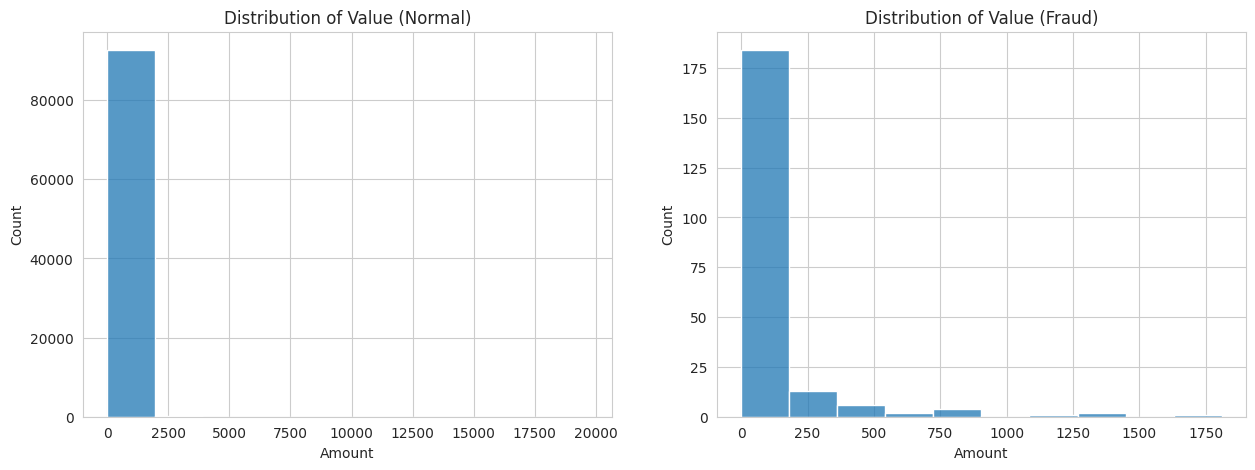

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df[df['Class'] == 0]['Amount'], bins=10, ax=ax1).set_title('Distribution of Value (Normal)')
sns.histplot(df[df['Class'] == 1]['Amount'], bins=10, ax=ax2).set_title('Distribution of Value (Fraud)')
plt.show()


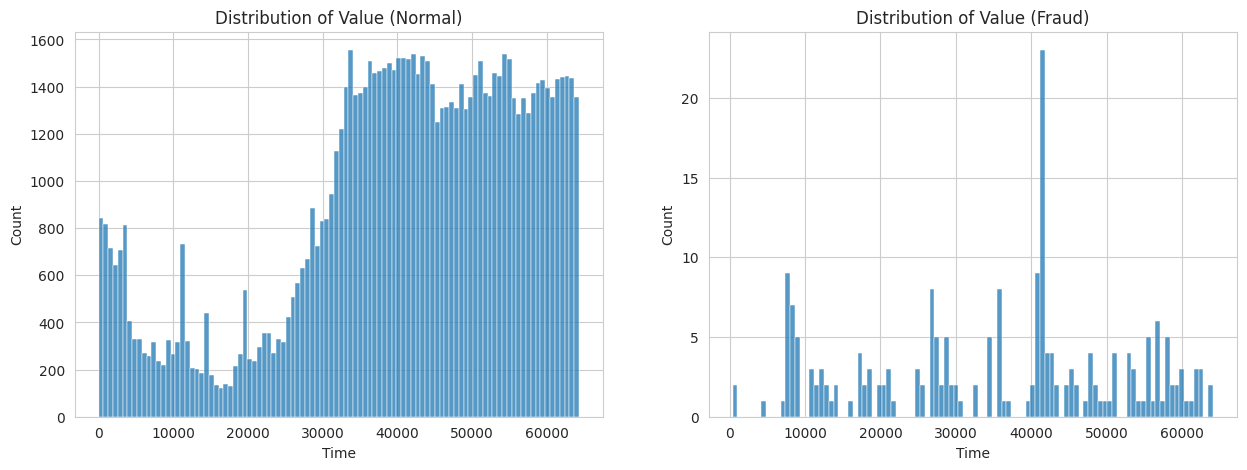

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df[df['Class'] == 0]['Time'], bins=100, ax=ax1).set_title('Distribution of Value (Normal)')
sns.histplot(df[df['Class'] == 1]['Time'], bins=100, ax=ax2).set_title('Distribution of Value (Fraud)')
plt.show()


In [13]:
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = pd.to_numeric(df[col], errors='coerce')

correlation_matrix = df.corr()
# Shows the correlation of all columns with 'Class', ordered from highest to lowest
print(correlation_matrix['Class'].sort_values(ascending=False))

Class     1.000000
V11       0.192092
V4        0.171345
V2        0.124634
V8        0.110336
V27       0.065089
V21       0.050932
V19       0.048562
V20       0.020421
V25       0.008746
V26       0.006737
V28       0.005991
V15       0.003340
Amount    0.001682
V13       0.000077
V22      -0.001627
V24      -0.009211
V23      -0.014466
Time     -0.015735
V6       -0.072302
V9       -0.125413
V5       -0.148102
V1       -0.153194
V18      -0.166768
V7       -0.250214
V16      -0.262995
V10      -0.284807
V12      -0.302803
V3       -0.317072
V14      -0.383287
V17      -0.425611
Name: Class, dtype: float64


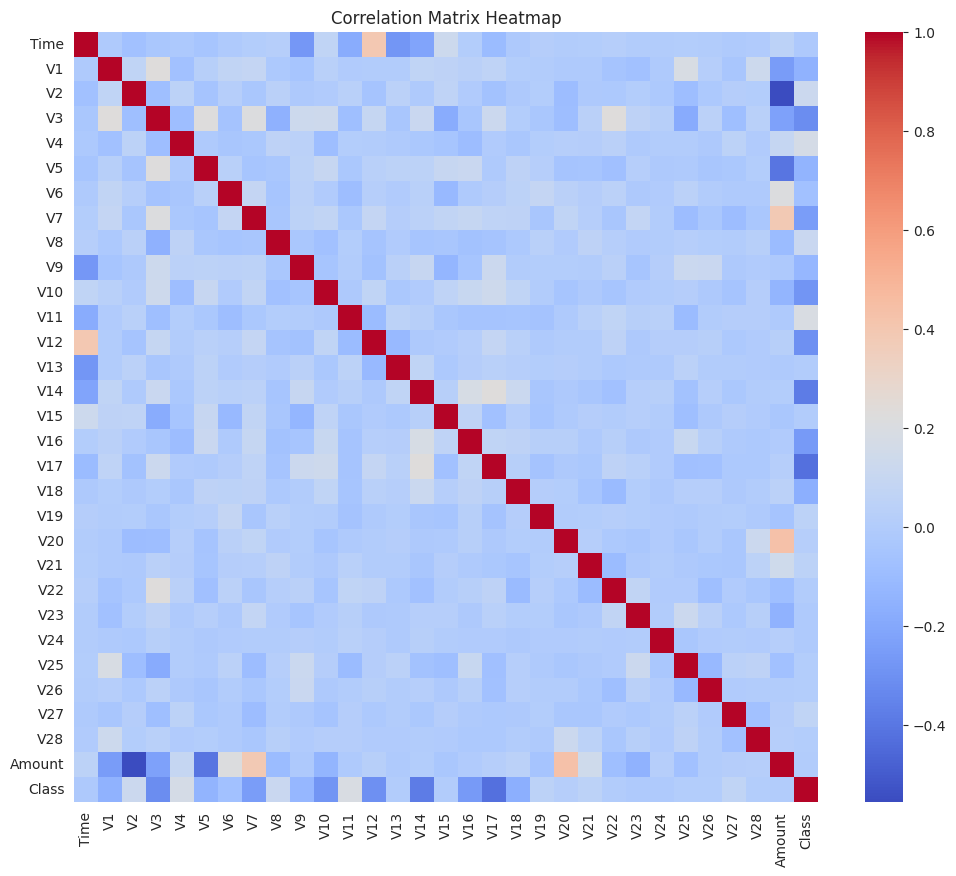

In [14]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# Drop rows with any missing values after converting to numeric
df.dropna(inplace=True)

# 2. Separate features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# 3. Split the data into training and testing sets
# We use stratify=y to ensure that the proportion of fraud is the same in the training and testing data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print('Training data:', X_train.shape)
print('Test data:', X_test.shape)
print('Fraud proportion in training:', round(y_train.value_counts(normalize=True)[1]*100, 2), '%')
print('Fraud proportion in testing:', round(y_test.value_counts(normalize=True)[1]*100, 2), '%')

Training data: (74544, 30)
Test data: (18636, 30)
Fraud proportion in training: 0.23 %
Fraud proportion in testing: 0.23 %


In [ ]:
from sklearn.linear_model import LogisticRegression

# 1. Instantiate the model
# We use 'random_state' to ensure the results are reproducible
# Increased 'max_iter' to ensure the model has enough "time" to learn
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# 2. Train the model with the TRAINING data!
print("Training the Logistic Regression model...")
lr_model.fit(X_train, y_train)
print("Training completed!")

Training the Logistic Regression model...


In [ ]:
from sklearn.metrics import accuracy_score

# Making predictions on test data
y_pred_lr = lr_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Model accuracy: {accuracy * 100:.2f}%")

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)

# View the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Expected Normal', 'Expected Fraud'],
            yticklabels=['Real Normal', 'Real Fraud'])
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show()

#Generate the Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['Normal (0)', 'Fraud (1)']))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#1. Instantiate the expert model
# n_estimators = number of "trees/detectives" in our ensemble
# random_state for reproducibility
# n_jobs=-1 uses all of your computer's processors to speed up training
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# 2. Train the model
print("Training the Random Forest model... (This may take a little longer)")
rf_model.fit(X_train, y_train)
print("Training complete!")

# 3. Make Predictions
y_pred_rf = rf_model.predict(X_test)

# 4. Evaluate the Expert
print("\n--- Random Forest Results ---")

# Generate the Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Expected Normal', 'Expected Fraud'],
            yticklabels=['Real Normal', 'Real Fraud'])
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show()

# Generate the Classification Report
print("\nClassification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf, target_names=['Normal (0)', 'Fraud (1)']))

In [ ]:
import joblib

#The model you trained (rf_model) is in memory. Let's save it to a file.
filename = 'fraud_model.joblib'

print(f"Saving the model to file: {filename}...")
joblib.dump(rf_model, filename)
print("Model saved successfully!")

# --- Quick Test (Optional, but recommended) ---
# Let's see if we can load the brain back and see if it still works.
print("\nLoading the model back for a test...")
loaded_model = joblib.load(filename)
print("Model loaded successfully!")

# Checking if the loaded model still produces the same results
result = loaded_model.score(X_test, y_test)
print(f"Accuracy of the loaded model in the test: {result*100:.2f}%")